In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_csv("breast_cancer/wdbc.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = data.iloc[:, 2:-1]
Y = data[1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(398, 29) (171, 29) (398,) (171,)


In [5]:
learning_rate = np.arange(0.1, 1, 0.1).tolist()
neurons = 6
CV = KFold(n_splits = 10)

In [6]:
for i in learning_rate:
    print(f"Learning Rate: {i}")
    clf = MLPClassifier(hidden_layer_sizes=(neurons,), learning_rate_init=i, activation="logistic", random_state=1)
    clf.fit(X_train, Y_train)
    acc = cross_val_score(clf, X, Y, scoring='accuracy', cv=CV, n_jobs = -1)
    print(f"Accuracy: {np.round(acc, 4)}")
    Y_pred = clf.predict(X_test)
    f1 = f1_score(Y_test, Y_pred, pos_label="B")
    print(f"F1-Score: {np.round(f1, 4)}\n")


Learning Rate: 0.1
Accuracy: [0.193  0.614  0.6316 0.5088 0.5088 0.7895 0.7193 0.7719 0.7719 0.7679]
F1-Score: 0.7742

Learning Rate: 0.2
Accuracy: [0.193  0.614  0.6316 0.5088 0.5088 0.7895 0.7193 0.7719 0.7719 0.7679]
F1-Score: 0.7742

Learning Rate: 0.30000000000000004
Accuracy: [0.193  0.614  0.6316 0.5088 0.5088 0.7895 0.7193 0.7719 0.7719 0.7679]
F1-Score: 0.7742

Learning Rate: 0.4
Accuracy: [0.193  0.614  0.6316 0.5088 0.5088 0.7895 0.7193 0.7719 0.7719 0.7679]
F1-Score: 0.7742

Learning Rate: 0.5
Accuracy: [0.193  0.614  0.6316 0.5088 0.5088 0.7895 0.7193 0.7719 0.7719 0.7679]
F1-Score: 0.7742

Learning Rate: 0.6
Accuracy: [0.193  0.614  0.6316 0.5088 0.5088 0.7895 0.7193 0.7719 0.7719 0.7679]
F1-Score: 0.7742

Learning Rate: 0.7000000000000001
Accuracy: [0.193  0.614  0.6316 0.5088 0.5088 0.7895 0.7193 0.7719 0.7719 0.7679]
F1-Score: 0.7742

Learning Rate: 0.8
Accuracy: [0.193  0.614  0.6316 0.5088 0.5088 0.7895 0.7193 0.7719 0.7719 0.7679]
F1-Score: 0.7742

Learning Rate: 0.

In [6]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.98


C:\Users\Areeka Aijaz\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


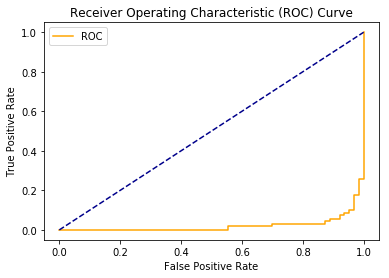

In [7]:
clf = MLPClassifier(hidden_layer_sizes=(neurons,), activation="logistic", random_state=1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict_proba(X_test)
Y_pred = Y_pred[:, 1]

auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label='B')
plot_roc_curve(fpr, tpr)